In [3]:
from matplotlib import font_manager, rc 
import matplotlib as mpl
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"]=False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os

# 차원축소 

- 차원의 저주 : featrure이 너무 많아서 1. 훈련속도 저하 2. 좋은 솔루션 찾기 힘듦의 문제가 나타나는 것
- 차원 축소 : 원본 데이터의 훈련 속도가 너무 느릴 때만 사용하는 것이 좋음
    - 속도가 빨라짐
    - 정보의 유실로 성능이 조금 나빠질 수 있음
    - 작업 파이프라인이 조금 더 복잡하고 데이터 유지 관리가 어려워짐
    - 드문 경우에 한하여, 불필요한 세부사항을 걸러냄으로써 성능 향상 가능
    - 시각화를 통해 중요한 통찰을 얻을 수 있음

## 1) 차원의 저주

- feature 가 증가하면 그를 위한 메모리와 처리시간이 기하급수적으로 증가함
- 불필요한 feature가 많아서 성능 저하가 일어날 가능성 또한 있음
- 저차원과 고차원
    - 경계선에 가까이(0.001 이내) 위치할 가능성 : 고차원의 경우 저차원보다 훨씬 더 경계에 가까이 위치
        - 2차원(1x1) : 1-(1-0.001x2)^2 = 0.4%
        - 고차원(10000차원) = 1-(1-0.001x2)^2 = 99.999%
    - 임의의 두 점의 거리 : 고차원이 많은 공간을 가지고 있기 때문에 고차원 데이터셋은 매우 희박, 대부분의 훈련 데이터가 서로 멀리 떨어져 있음, 훈련 데이터들끼리도 많이 떨어져있고, 훈련 데이터와 예측 데이터 간에도 굉장히 멀리 떨어져 있음 -> 해당 공간을 설명하기 위해 훨씬 더 많은 데이터가 필요
        - 2차원(1x1) : 0.52
        - 1,000,000차원 : 428.25
    - 충분한 밀도 : 고차원에서 충분한 밀도를 유지하기 위한 데이터 수는 저차원보다 기하급수적으로 증가
        - 저차원(1x1) : 10x10
        - 100차원 : 10^100

## 2) 차원축소 방법

### 2-1) 투영
- 데이터가 고차원 공간 안의 저차원 부분공간에 놓여져있을 때 적절
    - 어떤 feature는 데이터에 걸쳐 거의 변화가 없는 반면, 다른 feature들은 변화가 심한 경우
- ex) mnist데이터에서 가장자리의 흰색은 대부분 0이고, 안의 검은색의 차이가 뚜렷
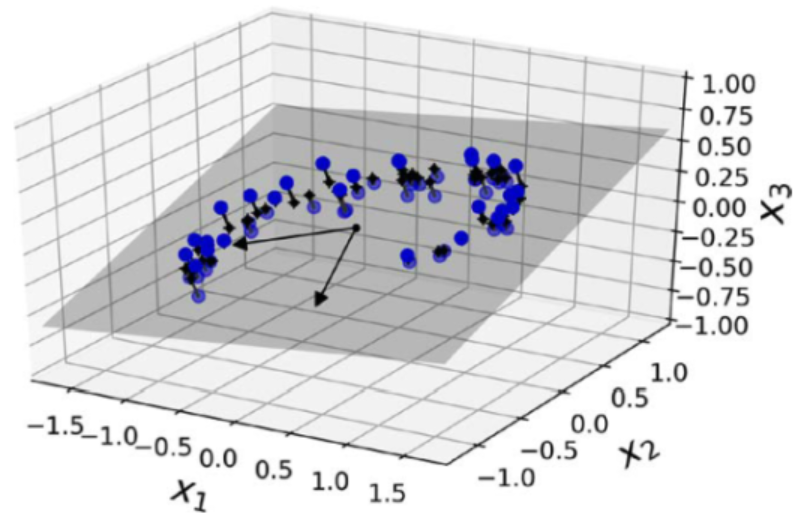
- 모든 훈련 샘플이 거의 평면 형태로 놓여져 있음


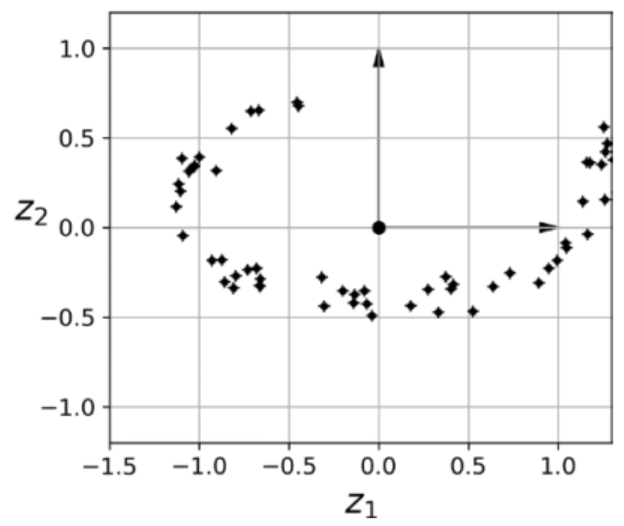

### 2-2) 매니폴드 학습

- 매니폴드 학습 : 훈련 샘플이 놓여있는 매니폴드를 모델링
    - 손글씨 데이터를 만들 때의 자유도는 아무 이미지나 생성할 때의 자유도보다 낮음
- 매니폴드 가정 : 
    - 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여있음
    - 고차원의 데이터가 저차원의 매니폴드 공간에 표현되면 더 간단해질 것
- 스위스 롤 : 돌돌 말려있는 것처럼 존재하는 데이터
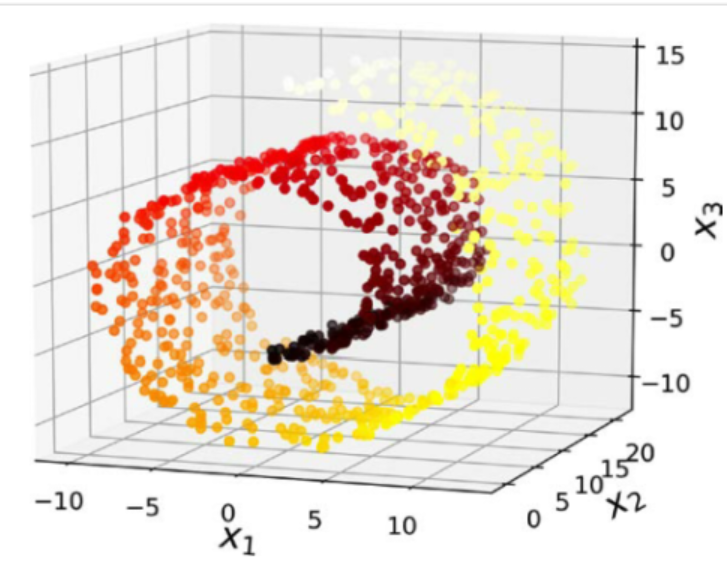



## 3) 차원 축소 알고리즘

### 3-1) PCA
- 원래 변수의 선형조합으로 분산이 가장 큰 새로운 변수를 추출
- 새로운 변수들은 서로 상관관계가 없음, 또한 서로 직교함
- X의 covariance matrix의 고유값 = 각 주성분의 분산
    - 이 때, 각 feature의 스케일이 따라 분산이 달라지지 않게 하기 위해 correlation matrix를 사용하는 것이 좋음


- 순서
    1. 분산을 가장 크게하는 변수의 선형 조합을 찾음 -> z1
        - 가장 큰 고유값의 고유벡터
    2. 그 다음으로 분산이 가장 크고, z1과 직교하는 변수의 선형 조합을 찾음 -> z2
        - 두번째로 큰 고유값의 고유벡터
    3. z가 p개까지 만들어질 때까지 반복 : 고유값이 p개까지 존재 가능하기 때문

- 각 주성분의 설명력 : 설명된 분산의 비율
    - 전체 주성분의 분산의 합에서 각각의 주성분이 차지하는 비율
    - (i번째 주성분의 분산)/(전체 주성분 분산의 합)
    - (i번째 주성분을 만드는데에 사용한 고유값)/(전체 고유값의 합)

#### 직접 주성분 추출 후 투영
- 데이터 표준화 필수

In [4]:
# 주성분 추출하기
X = np.random.randn(60,3)

X_centered = X-X.mean(axis = 0) # PCA는 스케일의 차이에 민감하기 때문에 반드시 표준화 과정을 거쳐주어야 함
U, s, Vt = np.linalg.svd(X_centered) # Vt : 고유벡터(단위벡터)- 행을 기준으로 # s : 고유값

c1 = Vt.T[:,0] # 첫번째(분산이 가장 큰) 단위벡터
c2 = Vt.T[:,1] # 두번째(두번째로 분산이 가장 큰) 단위벡터

In [5]:
# 주성분으로 데이터 투영하기

W2 = Vt.T[:,:2] # 두개의 두성분을 이용하겠다
X2D = X_centered.dot(W2) # 데이터를 주성분에 투영

#### 사이킷런을 이용
- 데이터 표준화 과정이 자동으로 내재되어 있음

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 두개의 두성분을 사용하겠다
X2D = pca.fit_transform(X) # X의 주성분을 찾고 투영

pca.components_ # 주성분들이 행 기준으로 나와 있음
pca.components_[0] # 첫번째 주성분

array([0.22917073, 0.33982632, 0.91213971])

#### 설명된 분산의 비율
- 해당 주성분이 가지는 정보의 양

In [26]:
pca.explained_variance_ratio_

array([0.38937753, 0.33149997])

#### 적절한 차원 수 선택

- 충분한 분산이 되도록 선택
- 시각화를 위해선 2~3차원으로 줄임

#### 목표 비율까지로 계산

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [47]:
pca  = PCA() # n_components를 설정하지 않으면 row(데이터 개수), columns(feature) 중 min 한 것으로 pca 함
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # 95%이상의 분산을 유지하는 데 필요한 최소한의 차원 수
print(d) # 2개의 주성분이면 약 95%의 정보의 양을 가짐

2


In [48]:
pca = PCA(n_components = 0.95) # n_components에 float형을 넣으면 보존하려는 분산의 비율이 나옴
X_reduced = pca.fit_transform(X_train)

#### 그래프를 통해 찾는 방법
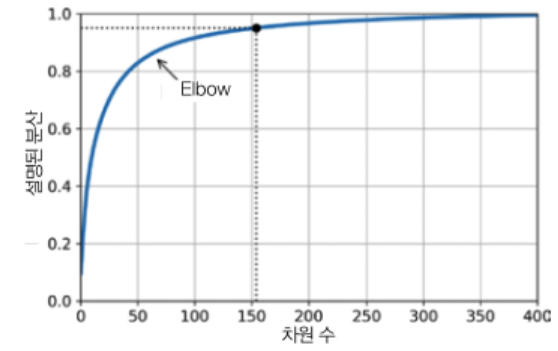  
- 해당 변곡점까지 설정할 경우 분산이 크게 달라지지 않음

### 3-1-2) 압축을 위한 PCA

- 차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어들기 때문에 알고리즘의 속도가 크게 빨라짐
- PCA를 통해 더 적은 feature을 갖게된 데이터를 다시 원래 차원으로 되돌릴 수도 있음
- 하지만, 이미 일정량의 정보(분산)을 잃어버렸기 때문에 원본과 매우 비슷한 데이터는 얻을 수 있지만, 원본 데이터는 얻을 수 없음.
- **재구성 오차** : 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리
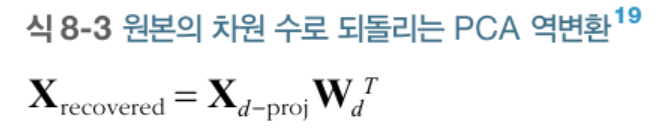

In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

In [12]:
pca = PCA(n_components=154)

X_reduced = pca.fit_transform(X) # pca로 데이터 압축
X_recorved = pca.inverse_transform(X_reduced) # 데이터 복원

Text(0.5, 1.0, '압축 후 복원')

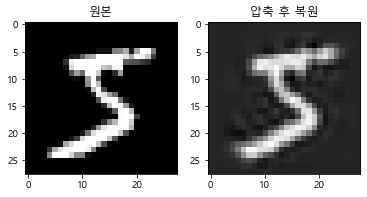

In [17]:
plt.subplot(1,2,1)
plt.imshow(X[0].reshape(28,28), cmap="gray")
plt.title("원본")
plt.subplot(1,2,2)
plt.imshow(X_recorved[0].reshape(28,28), cmap="gray")
plt.title("압축 후 복원")

### 3-1-3) 램덤 PCA

- 주성분의 근삿값을 확률적 알고리즘을 사용하여 빠르게 찾는 방법
- sklearn은 pca를 위해 메모리를 절약하는 SVD를 이용
    - 속도 : O(mxn^2)+O(n^3)
- 이를 확률적 알고리즘을 이용하면,
    - 속도 : O(mxd^2)+O(d^3)
    
- d(pca 후 feature 개수)가 n(원래의 feature 개수)보다 많이 작으면 완전 SVD보다 훨씬 빠름
- svd_solver : default : auto
    - m이나 n이 500보다 크고, d가 m이나 n의 80%보다 작으면 자동으로 랜덤 PCA, 아니면 SVD
    - SVD방식을 강제하려면, full
    - 랜덤 PCA방식을 강제하려면, randomized

In [19]:
rnd_pca = PCA(n_components = 154, svd_solver = "randomized") # 랜덤 pca방식을 강제

X_reduced = rnd_pca.fit_transform(X)

### 3-1-4) 점진적 PCA

- 훈련 세트를 미니배치로 나눈 뒤 IPCA알고리즘에 한 번에 하나씩 주입
- 훈련세트가 클 때 유용하고, 온라인으로 PCA를 적용하는 것도 가능
- 한번에 다 넣는 것과 결과는 같음
- 방법1: for문 이용
    - 미니배치가 하나씩 들어가면서 점점 학습됨. 학습이 완료된 이후에는 전체 데이터를 해당 pca로 변환하는 과정이 필요.
- 방법2: numpy의 memmap 파이썬 클래스 이용
    - 해당 변수를 memmap 형식으로 디스크에 저장해놓고, memmap 파일을 읽음
    - 필요할 때만 데이터의 필요한 부분만을 메모리에 적제
    - IncrementaPCA는 특정 순간에 배열의 일부만 사용하기 때문에 메모리 부족 문제를 해결할 수 있음

#### 방법1 : for문 이용 -> 디스크에서 파일 조금조금씩 읽어옴

In [25]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches): # 제일 높은 차수를 기준으로 데이터를 n개로 나누고 이를 리스트로 반환
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X)
    

#### 방법2 : memmap 이용 -> 디스크에서 불러와서 필요할 때만 사용하게

In [41]:
# 데이터와 일치하는 dtype 및 shape로 memmap을 만듦 -> 이런 형태가 디스크에 생김
X_mm = np.memmap("mnist2.dat", dtype="float32", mode="w+", shape=(70000,784))

# 만든 memmap 배열에 데이터 쓰기 
X_mm[:]=X[:]

In [42]:
# fp.filename == path.abspath(filename) -> 저장경로 확인

#삭제는 개체를 제거하기 전에 메모리 변경 사항을 디스크에 플러시합니다.
del X_mm 

newfp = np.memmap("mnist2.dat", dtype='float32', mode='r', shape=(70000,784))
newfp

memmap([[5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
batch_size = len(newfp)//n_batches

inc_pca = IncrementalPCA(n_components=154, batch_size = batch_size)
inc_pca.fit(newfp)

IncrementalPCA(batch_size=700, copy=True, n_components=154, whiten=False)

## 3-2) 커널 PCA

- PCA에 커널 트릭을 사용하여 복잡한 비선형 투영을 사용한 것.
- 기존 PCA는 선형 투영이었기 때문에 매니폴드에 가까운 데이터셋에 적용하기에 무리가 있었음. 커널 PCA를 이용하면 샘플의 군집을 유지하거나 매니폴드에 가까운 데이터셋을 펼칠 때도 유용
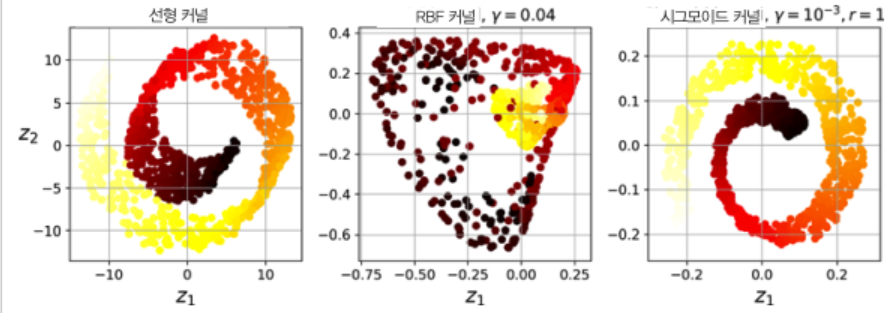

In [45]:
from sklearn.decomposition import KernelPCA
 
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)

### 3-2-1) 커널 PCA 하이퍼 파라미터 설정하기

- 커널 PCA의 경우 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 존재하지 X
- 따라서 각 커널 PCA 후, 지도 학습을 사용하여 가장 지도 학습 성능을 좋게 만드는 커널 PCA를 선택
- 예시) rbf를 사용한 경우, 원본 공간을 무한대의 공간으로 mapping한 다음 선형 PCA를 이용하여 차원을 축소
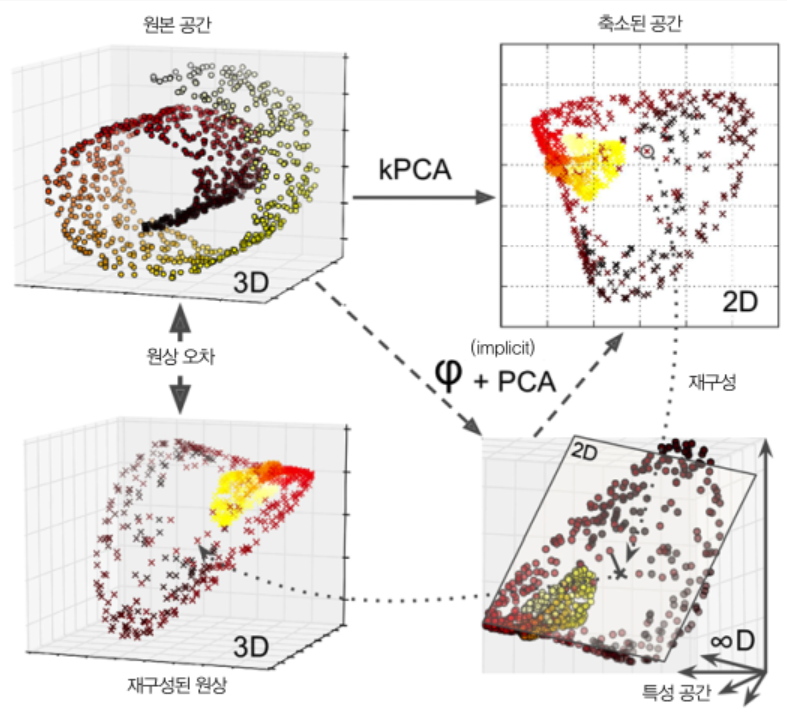

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

# 원래는 바로 {}하면 되는데, pipeline에 들어갈 것이기 때문에 []감싸고,
# 들어갈 pipeline안의 "모델 이름__하이퍼 파라미터 이름" 형식으로 해주어야 함
param_grid = [
    {"kpca__gamma": np.linspace(0.03,0.05,10),
    "kpca__kernel": ["rbf","sigmoid"]}
]


grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

In [ ]:
print(grid_search.best_params_) # 가장 좋은 커널과 파라미터 반환

- Kernel PCA를 통해 축소된 공간에 있는 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아닌 특성 공간에 놓임. 이 특성공간은 무한 차원(rbf의 경우)이기 때문에 재구성된 포인트를 계산할 수 없고, 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있음. 이를 **재구성 원상** 이라고 부름
- 재구성 원상을 얻게 되면 재구성 원상과 원본의 오차를 최소화하는 커널과 하이퍼파라미터 선택 가능

In [50]:
# fit_inverse_transform으로 자동 수행
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                   fit_inverse_transform = True)

X_reduced = rbf_pca.fit_transform([X[1]])
X_preimage = rbf_pca.inverse_transform(X_reduced)
# inverse_transform()메서드는 fit_inverse_transform = True를 지정했을 때에만 생성됨


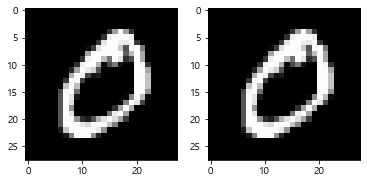

In [64]:
plt.subplot(1,2,1)
plt.imshow(X[1].reshape(28,28), cmap="gray")
plt.subplot(1,2,2)
plt.imshow(X_preimage.reshape(28,28), cmap="gray")

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error([X[1]], X_preimage)

2152.5322066326535

## 3-3) LLE

- 지역 선형 임베딩, 매니폴드와 같은 데이터에 적용 가능
- 지역적으로 선형적인 연관성을 찾고, 변환 후 이러한 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾음.

In [99]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X[1:100])

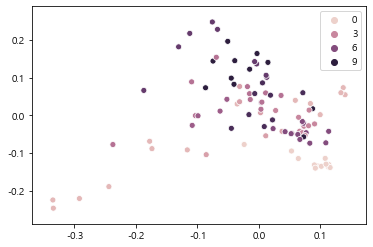

In [100]:
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y[1:100])

## 3-4) 다른 차원 축소 기법

- 랜덤 투영 : 랜덤한 선형투영을 이용하여 데이터를 저차원 공간으로 투영
    - 실제로 거리를 잘 보존하는 것으로 밝혀짐
    - 초기 차원수에는 의존하지 않고, 샘플수와 목표차원수에 의존
    
- 다차원 스케일링 : 샘플 간의 거리를 보존하면서 차원을 축소

- lsomap : 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만듦. 그 후, 샘플 간의 지오데식 거리를 유지하면서 차원을 축소
*지오데식 거리 : 두 노드 사이의 최단 경로를 이루는 노드의 수

- t-SNE : 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소. 주로 시각화에 많이 사용되며, 특히 고차원 공간에 있는 샘플의 군집을 시각화할 때 사용됨.(MNIST 데이터 같은)

- LDA : 지도학습 분류 알고리즘으로, 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습, 이 축을 데이터가 투영되는 초평면을 정의하는 데 사용함. 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 SVM분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 좋음.

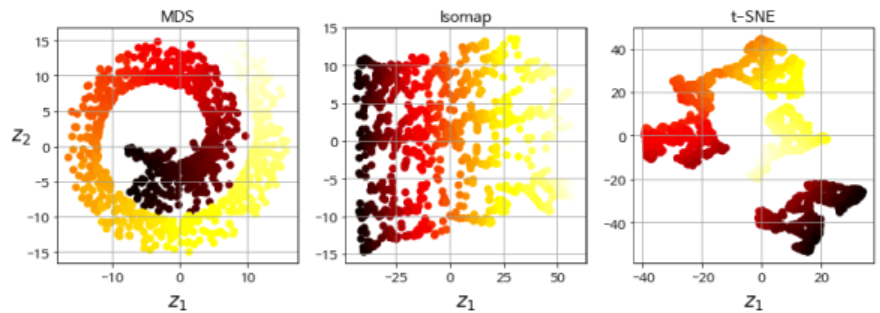